In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as nm
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [111]:
data = pd.read_csv('marketing_customer_analysis_final_round.csv')

In [112]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [113]:
data.shape

(10910, 25)

In [114]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower())
data.columns = cols

In [115]:
data.select_dtypes('number')

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [116]:
data.select_dtypes('object')


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [117]:
data.isna().sum()


customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [118]:
data.drop(['vehicle type'],axis=1,inplace=True)


In [119]:
data.isna().sum()/len(data)


customer                         0.000000
state                            0.057837
customer lifetime value          0.000000
response                         0.057837
coverage                         0.000000
education                        0.000000
effective to date                0.000000
employmentstatus                 0.000000
gender                           0.000000
income                           0.000000
location code                    0.000000
marital status                   0.000000
monthly premium auto             0.000000
months since last claim          0.058020
months since policy inception    0.000000
number of open complaints        0.058020
number of policies               0.000000
policy type                      0.000000
policy                           0.000000
renew offer type                 0.000000
sales channel                    0.000000
total claim amount               0.000000
vehicle class                    0.057012
vehicle size                     0

In [120]:
nulls_dframe = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_dframe.columns = ['column_name','percent_nulls']
nulls_dframe[nulls_dframe['percent_nulls'] >= 0.05]

,column_name,percent_nulls
1,state,0.057837
3,response,0.057837
13,months since last claim,0.058020
15,number of open complaints,0.058020
22,vehicle class,0.057012
23,vehicle size,0.057012


In [121]:
data.dropna(subset=['state','response','months since last claim', 'number of open complaints', 'vehicle class', 'vehicle size'],inplace=True)


In [122]:
data['effective to date'] = pd.to_datetime(data['effective to date'],errors='coerce')


In [123]:
data['month'] = pd.DatetimeIndex(data['effective to date']).month 


In [124]:
data['month']

0        2
1        1
2        2
3        1
6        2
        ..
10903    1
10904    2
10906    1
10907    2
10908    2
Name: month, Length: 9134, dtype: int64

In [125]:
data[(data['month'] > 0) & (data['month'] < 4)]


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [126]:
data['month'].value_counts()


1    4898
2    4236
Name: month, dtype: int64

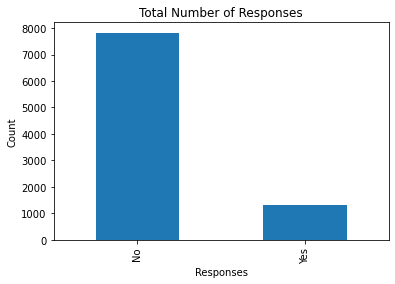

In [127]:
total_responses = data['response'].value_counts()
total_responses.plot(kind='bar')
plt.title('Total Number of Responses')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.show()

  sales channel response  response_rate
1         Agent      Yes      19.154443
3        Branch      Yes      11.453058
5   Call Center      Yes      10.878187
7           Web      Yes      11.773585


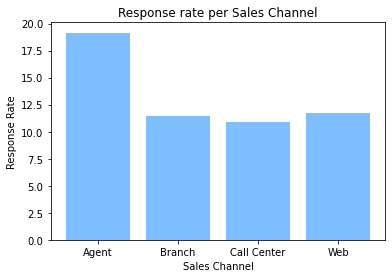

In [128]:
response_rate = data['response'].groupby(data['sales channel']).value_counts(normalize=True).mul(100).reset_index(name='response_rate')
response_rate = response_rate[response_rate['response'] == 'Yes']
print(response_rate)

plt.bar(response_rate['sales channel'], response_rate['response_rate'], color='#80bfff')
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate")
plt.title("Response rate per Sales Channel")
plt.show()

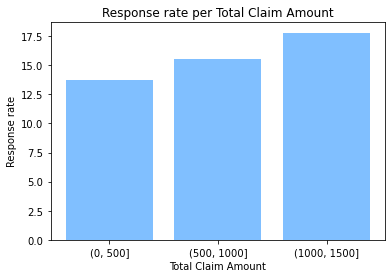

In [129]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
data['total claim amount bins'] = pd.cut(data['total claim amount'], bins)
percent_yes = data['response'].groupby(data['total claim amount bins']).value_counts(normalize=True).mul(100).reset_index(name='percentage_yes')
percent_yes = percent_yes[percent_yes['response'] == 'Yes']
plt.bar(percent_yes['total claim amount bins'].astype(str), percent_yes['percentage_yes'], color='#80bfff')
plt.xlabel("Total Claim Amount")
plt.ylabel("Response rate")
plt.title("Response rate per Total Claim Amount")
plt.show()

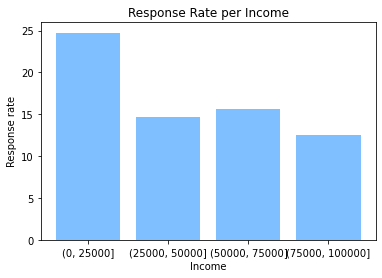

In [130]:
data['income bins'] = pd.cut(data['income'],bins=[0, 25000, 50000, 75000, 100000])
income_percent_yes = data['response'].groupby(data['income bins']).value_counts(normalize=True).mul(100).reset_index(name='income_percentage_yes')
income_percent_yes = income_percent_yes[income_percent_yes['response'] == 'Yes']
plt.bar(income_percent_yes['income bins'].astype(str), income_percent_yes['income_percentage_yes'], color='#80bfff')
plt.xlabel("Income")
plt.ylabel("Response rate")
plt.title("Response Rate per Income")
plt.show()

In [131]:
data.dtypes


customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [132]:
numerical = data._get_numeric_data()
categorical = data.select_dtypes('object')

In [133]:
numerical.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


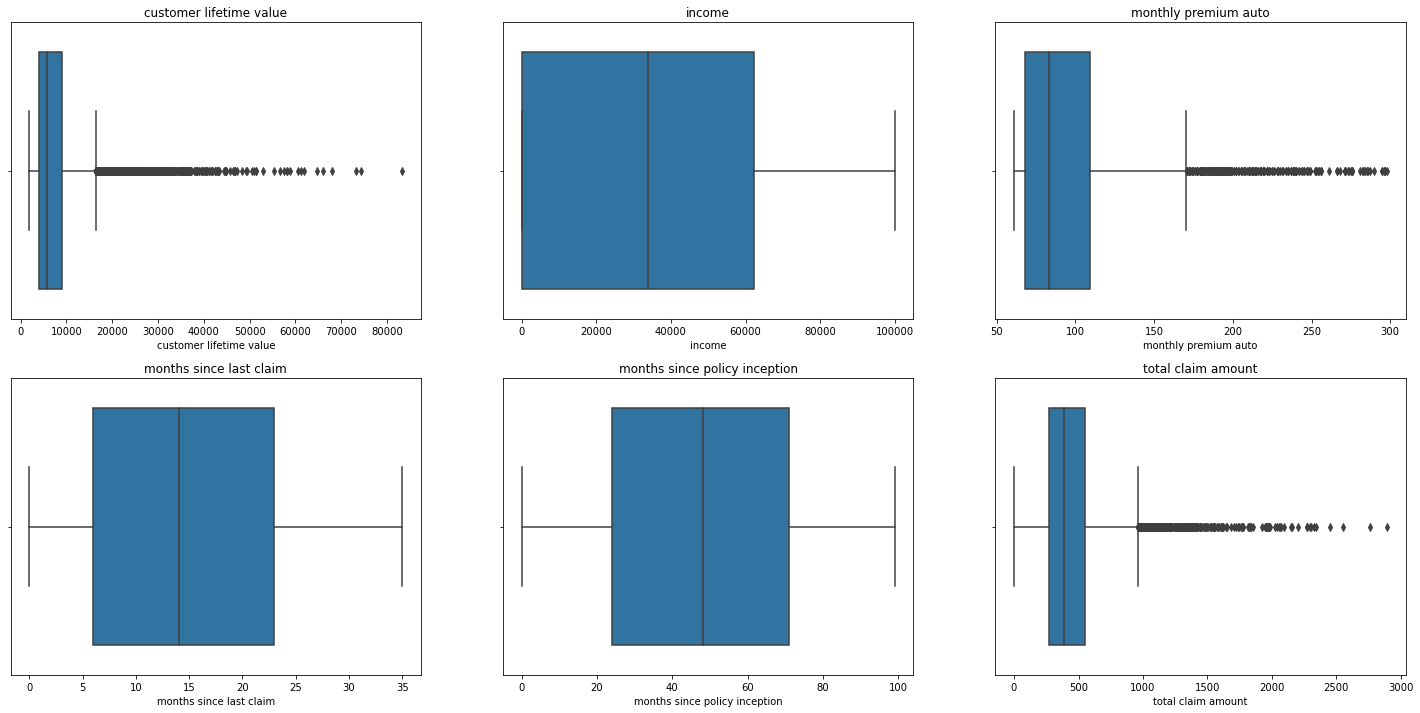

In [134]:
fig, axs = plt.subplots(2, 3, figsize=(25, 12))
for i, col in enumerate(data[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
    ax = axs[i//3, i%3]
    sns.boxplot(data=numerical, x=col, ax=ax)
    ax.set_title(col)
plt.show()

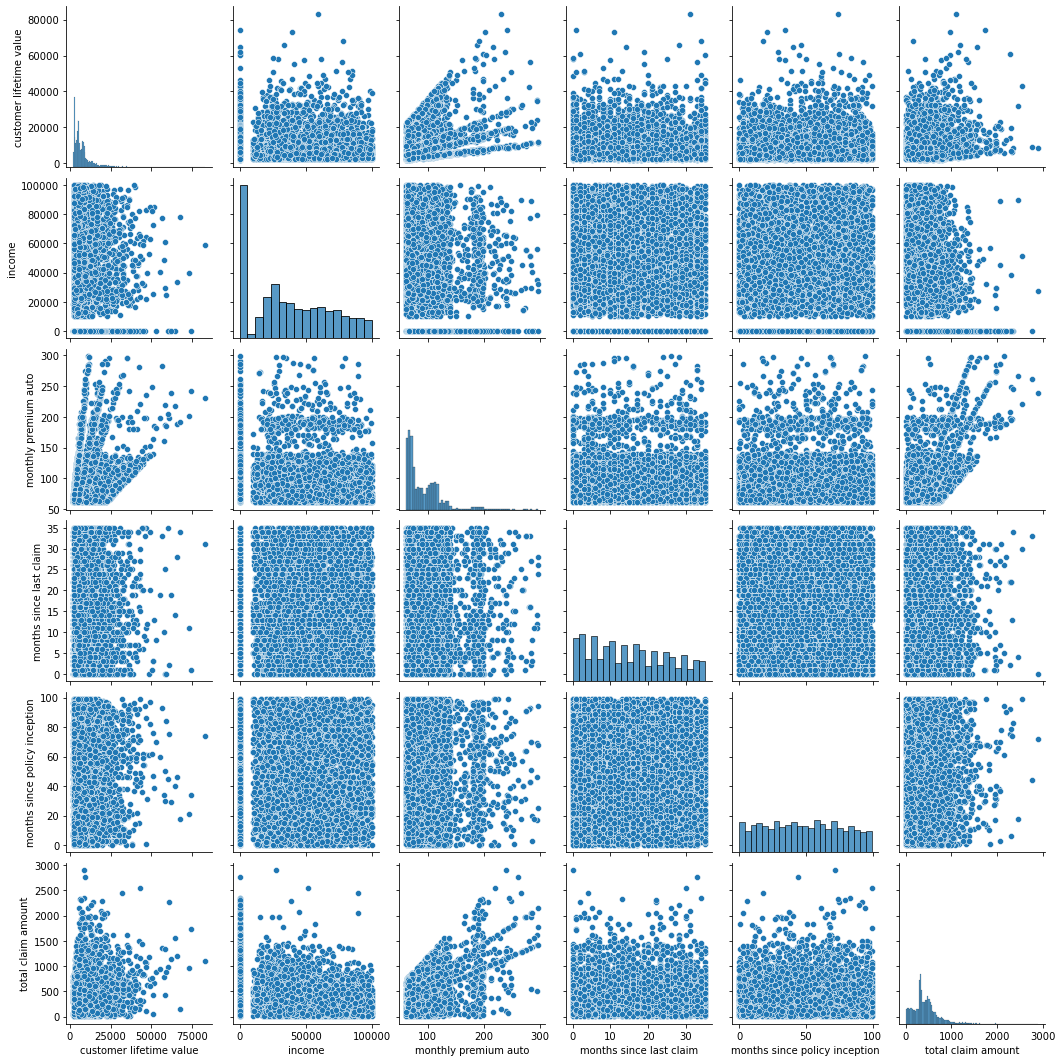

In [135]:
sns.pairplot(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']])
plt.show()

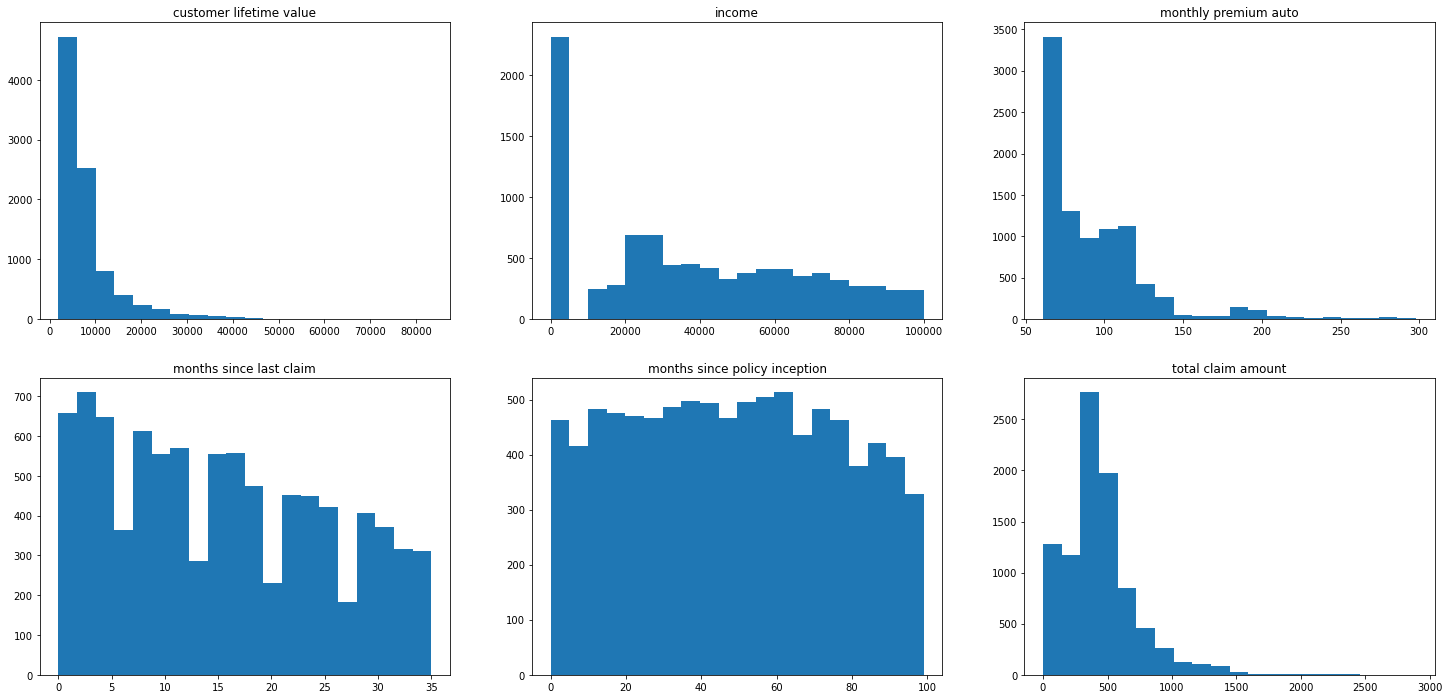

In [136]:
fig, axs = plt.subplots(2, 3, figsize=(25, 12))
for i, col in enumerate(data[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
    ax = axs[i//3, i%3]
    ax.hist(data[col], bins=20)
    ax.set_title(col)
plt.show()

In [137]:
r = numerical.corr()
r

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [138]:
r_high= numerical.corr(method='pearson')[numerical.corr() > 0.5]
r_high

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
customer lifetime value,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly premium auto,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.632017,NaN
months since last claim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
months since policy inception,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
number of open complaints,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
number of policies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
total claim amount,NaN,NaN,0.632017,NaN,NaN,NaN,NaN,1.000000,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


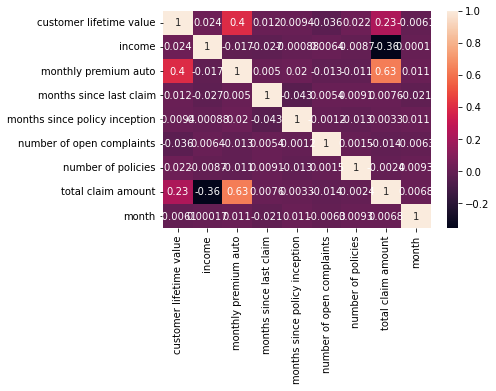

In [139]:
sns.heatmap(numerical.corr(),annot=True)  # annot= anotations 
plt.show()

In [140]:
X=numerical.drop(["total claim amount"],axis=1)
Y=numerical["total claim amount"]
Y

0        292.800000
1        744.924331
2        480.000000
3        484.013411
6        287.556107
            ...    
10903    355.200000
10904    897.600000
10906    273.018929
10907    381.306996
10908    618.288849
Name: total claim amount, Length: 9134, dtype: float64

In [141]:
from sklearn.preprocessing import LabelEncoder

X['customer lifetime value_temp'] = LabelEncoder().fit(X['customer lifetime value']).transform(X['customer lifetime value'])
X.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,customer lifetime value_temp
0,4809.216960,48029,61,7.0,52,0.0,9,2,2755
1,2228.525238,0,64,3.0,26,0.0,1,1,78
2,14947.917300,22139,100,34.0,31,0.0,2,2,7171
3,22332.439460,49078,97,10.0,3,0.0,2,1,7660
6,5035.035257,37405,63,8.0,99,3.0,4,2,3078


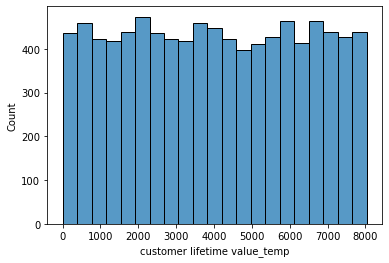

In [142]:
sns.histplot(X['customer lifetime value_temp'])
plt.show()

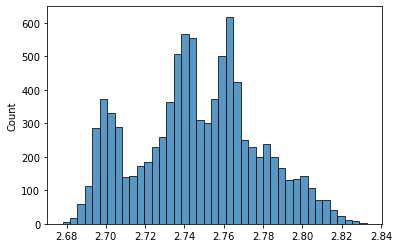

In [143]:
arr, lmbda = stats.boxcox(X['customer lifetime value'])
sns.histplot(arr)
plt.show()

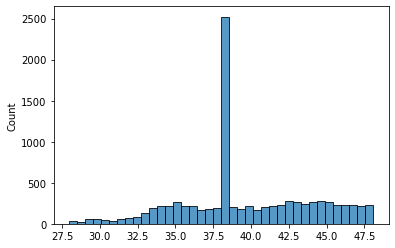

In [144]:
X["income_temp"]=np.where(X["income"]<0,0,X["income"])
X["income_temp"]=X["income_temp"].replace(0,X["income"].mean())

arr, lmbda=stats.boxcox(X["income_temp"])
sns.histplot(arr)
plt.show()

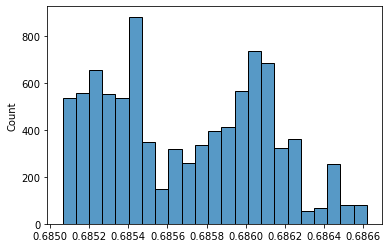

In [145]:
arr, lmbda=stats.boxcox(X["monthly premium auto"])
sns.histplot(arr)
plt.show()

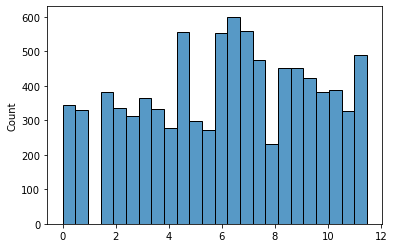

In [146]:
X["months since last claim_temp"]=np.where(X["months since last claim"]<0,0,X["months since last claim"])
X["months since last claim_temp"]=X["months since last claim_temp"].replace(0,X["months since last claim"].mean())

arr, lmbda=stats.boxcox(X["months since last claim_temp"])
sns.histplot(arr)
plt.show()

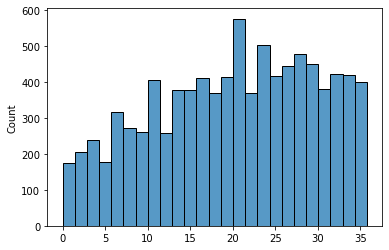

In [147]:
X["months since policy inception_temp"]=np.where(X["months since policy inception"]<0,0,X["months since policy inception"])
X["months since policy inception_temp"]=X["months since policy inception_temp"].replace(0,X["months since policy inception"].mean())

arr, lmbda=stats.boxcox(X["months since policy inception_temp"])
sns.histplot(arr)
plt.show()

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=100)


In [149]:
model = sm.OLS(Y_train,X_train).fit()


In [150]:
predictions = model.predict(X_test)


In [151]:
print('r2 score is: ',r2_score(Y_test,predictions))


r2 score is:  0.5169311943747121


In [152]:
mse = mean_squared_error(Y_test, predictions)
print('mean square error is: ',mse)

mean square error is:  38537.86742211946


In [153]:
rmse = math.sqrt(mse)
print('root mean square error is: ',rmse)

root mean square error is:  196.31064011438468


In [154]:
mae = mean_absolute_error(Y_test,predictions)
print('root mean absolute error is: ',mae)

root mean absolute error is:  142.32806935955156
